In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.1 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 69.6 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import AutoTokenizer, TFAutoModel, TFAutoModelForMaskedLM

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,Modelling the effect of round window stiffness...,Preservation of residual hearing after cochlea...,[NEUR],"[Cochlear implant, Residual hearing, Round win...",[2809],[There is increasing interest in the preservat...,[Round window stiffness is predicted to increa...
1,Human Pericardial Fluid Contains Exosomes Enri...,The pericardial fluid (PF) is contained in the...,"[BIOC, PHAR]","[angiogenesis, clinical samples, exosomes, ext...","[1311, 1312, 1313, 3002, 3004]",[The pericardial fluid (PF) is an ultrafiltrat...,[]
2,Refinement of atomic models in high resolution...,As the resolutions of Three Dimensional Electr...,[BIOC],"[3D-EM, Density fitting, Flexible fitting, Mod...","[1300, 1312]",[Cellular processes are governed by bio-molecu...,[]
3,IMBER - Research for marine sustainability: Sy...,The Integrated Marine Biogeochemistry and Ecos...,"[EART, ENVI]","[Biogeochemical cycles, Global environmental c...","[1901, 2303, 2306]","[The marine realm, which includes coastal, con...",[IMBER advances understanding of end-to-end (p...
4,Thermal conductivity in the three layered regi...,Thermal conductivity of the polymer electrolyt...,"[ENER, PHYS]","[Computer tomography, Gas diffusion layer, Mic...","[2102, 2103, 2105, 3104]",[Hydrogen can be extracted from a wide range o...,[The MPL and the PTL form a third composite ma...


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(32072, 7)
(4009, 7)
(4008, 7)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

def trim_text(text, word_limit):
    """
    Trims text to a specific word limit.

    Args:
    - text (str or list): Text to be trimmed.
    - word_limit (int): The initial word limit to apply.

    Returns:
    - str: Text trimmed to the specified word limit.
    """
    if isinstance(text, list):
        text = ' '.join(text)
    elif text is None:
        return ""

    words = text.split()[:word_limit]
    return ' '.join(words)

def add_additional_body_text(body_text, start_index, word_limit):
    """
    Extracts additional words from the body text starting from a specific index.

    Args:
    - body_text (str or list): The body text from which to extract additional words.
    - start_index (int): The index to start extracting additional words.
    - word_limit (int): The number of additional words to extract.

    Returns:
    - str: The additional text extracted from the body text.
    """
    if isinstance(body_text, list):
        body_text = ' '.join(body_text)

    words = body_text.split()[start_index:start_index+word_limit]
    return ' '.join(words)


def prepare_elsevier_data(train_df, val_df, test_df, abstract_column_name='abstract', body_text_column_name='body_text', title_column_name= 'title', keyword_column_name='keywords', label_column_name='subjareas'):
    """
    Prepares the Elsevier corpus splits for processing with two stages:
    1. First 200 words of the abstract and first 300 words of the body text.
    2. Next 500 words of the body text.
    """
    mlb = MultiLabelBinarizer()
    all_labels = pd.concat([train_df[label_column_name], val_df[label_column_name], test_df[label_column_name]])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df[label_column_name])
    val_labels = mlb.transform(val_df[label_column_name])
    test_labels = mlb.transform(test_df[label_column_name])

    join_keywords = lambda keywords: ' '.join(keywords) if isinstance(keywords, list) else ''

    def process_texts(df):
        concatenated_texts = []
        for abstract, body, title, keywords in zip(df[abstract_column_name], df[body_text_column_name], df[title_column_name], df[keyword_column_name]):
            initial_sequence = f"{trim_text(abstract, 200)} [SEP] {trim_text(body, 200)} [SEP] {trim_text(title, 50)} [SEP] {join_keywords(keywords)}"

            text_segments = [initial_sequence]

            additional_body_text = add_additional_body_text(body, 300, 500)
            if additional_body_text:
                text_segments.append(additional_body_text)

            second_additional_body_text = add_additional_body_text(body, 800, 500)
            if second_additional_body_text:
                text_segments.append(second_additional_body_text)

            third_additional_body_text = add_additional_body_text(body, 1300, 500)
            if third_additional_body_text:
                text_segments.append(third_additional_body_text)

            concatenated_texts.append(text_segments)
        return concatenated_texts

    concatenated_train_texts = process_texts(train_df)
    concatenated_val_texts = process_texts(val_df)
    concatenated_test_texts = process_texts(test_df)

    return (concatenated_train_texts, train_labels,
            concatenated_val_texts, val_labels,
            concatenated_test_texts, test_labels,
            mlb.classes_)


concatenated_train_texts, train_labels, concatenated_val_texts, val_labels, concatenated_test_texts, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)


In [ ]:
print(train_labels[:2])
print(concatenated_train_texts[:2])
print(len(target_names))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
[['Preservation of residual hearing after cochlear implantation is now considered an important goal of surgery. However, studies indicate an average post-operative hearing loss of around 20 dB at low frequencies. One factor which may contribute to post-operative hearing loss, but which has received little attention in the literature to date, is the increased stiffness of the round window, due to the physical presence of the cochlear implant, and to its subsequent thickening or to bone growth around it. A finite element model was used to estimate that there is approximately a 100-fold increase in the round window stiffness due to a cochlear implant passing through it. A lumped element model was then developed to study the effects of this change in stiffness on the acoustic response of the cochlea. As the round window stiffness increases, the effects of the cochlear and vestibular aqueducts become more importa

In [ ]:
print(len(concatenated_train_texts))
print(len(concatenated_val_texts))

32072
4009


In [ ]:
# Convert validation labels to a NumPy array
npvalid_labels = np.asarray(val_labels)
nptrain_labels = np.asarray(train_labels)
nptest_labels = np.asarray(test_labels)


In [ ]:
model_checkpoint = 'allenai/scibert_scivocab_cased'

scibert_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

scibert_model = TFAutoModel.from_pretrained(model_checkpoint, from_pt=True)

scibert_mlm = TFAutoModelForMaskedLM.from_pretrained(model_checkpoint, from_pt=True)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
def tokenize_texts(text_segments_list, tokenizer, max_length=512):
    """
    Tokenizes a list of text segments using the provided tokenizer.

    Args:
        text_segments_list (list of list of str): Each inner list contains one or more text segments for a document.
        tokenizer: The tokenizer to use.
        max_length (int): The maximum token length for each segment.

    Returns:
        A list of tokenized and encoded text segments suitable for model input.
    """
    tokenized_outputs = []

    for text_segments in text_segments_list:
        document_encodings = [tokenizer(text, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf') for text in text_segments]
        tokenized_outputs.append(document_encodings)

    return tokenized_outputs

train_encodings = tokenize_texts(concatenated_train_texts, scibert_tokenizer)
valid_encodings = tokenize_texts(concatenated_val_texts, scibert_tokenizer)
test_encodings = tokenize_texts(concatenated_test_texts, scibert_tokenizer)


Save the encodings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pickle


result_path = '/content/drive/MyDrive/'

with open('train_encodings.pkl', 'wb') as f:
    pickle.dump(train_encodings, f)

with open('valid_encodings.pkl', 'wb') as f:
    pickle.dump(valid_encodings, f)

with open('test_encodings.pkl', 'wb') as f:
    pickle.dump(test_encodings, f)


Mounted at /content/drive


Load the encodings

In [ ]:
with open('train_encodings.pkl', 'rb') as f:
    loaded_train_encodings = pickle.load(f)

with open('valid_encodings.pkl', 'rb') as f:
    loaded_valid_encodings = pickle.load(f)

with open('test_encodings.pkl', 'rb') as f:
    loaded_test_encodings = pickle.load(f)


In [ ]:
import pandas as pd
import numpy as np

def compute_sample_weights(df, label_column):
    """
    Compute sample weights for multi-label classification.

    Parameters:
    - df: pandas DataFrame containing the training data
    - label_column: string name of the DataFrame column containing the labels lists

    Returns:
    - sample_weights: numpy array of sample weights where rows correspond to samples
    """
    label_freq = pd.Series([label for sublist in df[label_column] for label in sublist]).value_counts()

    label_weights = 1 / label_freq

    label_weights /= label_weights.sum()

    label_weight_map = label_weights.to_dict()

    sample_weights = []

    for labels in df[label_column]:
        sample_weight = sum([label_weight_map[label] for label in labels])
        sample_weights.append(sample_weight)

    return np.array(sample_weights)

sample_weights = compute_sample_weights(train_df, 'subjareas')


In [ ]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer

def build_finetune_scibert_with_cnn_segments(pretrained_model_name_or_path='allenai/scibert_scivocab_cased', num_classes=18, hidden_size=[1024], dropout=0.1, learning_rate=0.00005, cnn_filters=64, kernel_size=5, pooling_size=2, from_pt=True):
    tf.keras.backend.clear_session()

    pretrained_LLM = TFAutoModel.from_pretrained(pretrained_model_name_or_path, from_pt=from_pt)
    pretrained_LLM.trainable = True

    input_ids_1 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_1')
    attention_mask_1 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_1')

    input_ids_2 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_2')
    attention_mask_2 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_2')

    input_ids_3 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_3')
    attention_mask_3 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_3')

    input_ids_4 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_4')
    attention_mask_4 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_4')


    cls_embeddings = []
    for input_ids, attention_mask in [(input_ids_1, attention_mask_1), (input_ids_2, attention_mask_2), (input_ids_3, attention_mask_3)]:
        llm_out = pretrained_LLM({'input_ids': input_ids, 'attention_mask': attention_mask})
        cls_embedding = llm_out.last_hidden_state[:, 0, :]
        cls_embeddings.append(cls_embedding)

    combined_cls_embeddings = tf.keras.layers.Concatenate(axis=1)(cls_embeddings)

    combined_cls_embeddings_expanded = tf.expand_dims(combined_cls_embeddings, axis=-1)

    cnn_layer = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=kernel_size, activation='relu')(combined_cls_embeddings_expanded)
    pooling_layer = tf.keras.layers.MaxPooling1D(pool_size=pooling_size)(cnn_layer)
    flattened_layer = tf.keras.layers.Flatten()(pooling_layer)

    hidden = flattened_layer
    for i, size in enumerate(hidden_size):
        hidden = tf.keras.layers.Dense(size, activation='relu', name=f'hidden_layer_{i}')(hidden)
        hidden = tf.keras.layers.Dropout(dropout)(hidden)

    output_classification = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hidden)

    model_inputs = [input_ids_1, attention_mask_1, input_ids_2, attention_mask_2, input_ids_3, attention_mask_3, input_ids_4, attention_mask_4]
    classification_model = tf.keras.Model(inputs=model_inputs, outputs=[output_classification])

    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model


In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
model_checkpoint = 'allenai/scibert_scivocab_cased'
num_subject_areas = 18
max_length = 512

cnn_filters = 64
kernel_size = 7
pooling_size = 2

scibert_model = build_finetune_scibert_with_cnn_segments(
    pretrained_model_name_or_path=model_checkpoint,
    num_classes=num_subject_areas,
    hidden_size=[1024],
    dropout=0.1,
    learning_rate=0.00005,
    cnn_filters=cnn_filters,
    kernel_size=kernel_size,
    pooling_size=pooling_size,
    from_pt=True
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
scibert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask_segment_1 (  [(None, None)]               0         []                            
 InputLayer)                                                                                      
                                                                                                  
 input_ids_segment_1 (Input  [(None, None)]               0         []                            
 Layer)                                                                                           
                                                                                                  
 attention_mask_segment_2 (  [(None, None)]               0         []                            
 InputLayer)                                                                                  

In [ ]:
def restructure_encodings_for_training(tokenized_outputs):
    input_ids_segment_1, attention_masks_segment_1 = [], []
    input_ids_segment_2, attention_masks_segment_2 = [], []
    input_ids_segment_3, attention_masks_segment_3 = [], []
    input_ids_segment_4, attention_masks_segment_4 = [], []

    for doc_encodings in tokenized_outputs:
        segment_1 = doc_encodings[0]
        input_ids_segment_1.append(segment_1['input_ids'].numpy())
        attention_masks_segment_1.append(segment_1['attention_mask'].numpy())

        if len(doc_encodings) > 1:
            segment_2 = doc_encodings[1]
            input_ids_segment_2.append(segment_2['input_ids'].numpy())
            attention_masks_segment_2.append(segment_2['attention_mask'].numpy())
        else:
            input_ids_segment_2.append(segment_1['input_ids'].numpy())
            attention_masks_segment_2.append(segment_1['attention_mask'].numpy())

        if len(doc_encodings) > 2:
            segment_3 = doc_encodings[2]
            input_ids_segment_3.append(segment_3['input_ids'].numpy())
            attention_masks_segment_3.append(segment_3['attention_mask'].numpy())
        else:
            input_ids_segment_3.append(segment_1['input_ids'].numpy())
            attention_masks_segment_3.append(segment_1['attention_mask'].numpy())

        if len(doc_encodings) > 3:
            segment_4 = doc_encodings[3]
            input_ids_segment_4.append(segment_4['input_ids'].numpy())
            attention_masks_segment_4.append(segment_4['attention_mask'].numpy())
        else:
            input_ids_segment_4.append(segment_1['input_ids'].numpy())
            attention_masks_segment_4.append(segment_1['attention_mask'].numpy())

    input_ids_segment_1 = np.vstack(input_ids_segment_1)
    attention_masks_segment_1 = np.vstack(attention_masks_segment_1)
    input_ids_segment_2 = np.vstack(input_ids_segment_2)
    attention_masks_segment_2 = np.vstack(attention_masks_segment_2)
    input_ids_segment_3 = np.vstack(input_ids_segment_3)
    attention_masks_segment_3 = np.vstack(attention_masks_segment_3)
    input_ids_segment_4 = np.vstack(input_ids_segment_4)
    attention_masks_segment_4 = np.vstack(attention_masks_segment_4)

    return [input_ids_segment_1, attention_masks_segment_1, input_ids_segment_2, attention_masks_segment_2, input_ids_segment_3, attention_masks_segment_3,input_ids_segment_4,attention_masks_segment_4]

train_inputs = restructure_encodings_for_training(train_encodings)
valid_inputs = restructure_encodings_for_training(valid_encodings)
test_inputs = restructure_encodings_for_training(test_encodings)

model_history = scibert_model.fit(
    train_inputs,
    train_labels,
    validation_data=(valid_inputs, val_labels),
    batch_size=8,
    epochs=3,
    sample_weight=sample_weights
)


Epoch 1/3


4009/4009 [==============================] - 2715s 664ms/step - loss: 0.0152 - accuracy: 0.4721 - val_loss: 0.1461 - val_accuracy: 0.5286
Epoch 2/3
4009/4009 [==============================] - 2646s 660ms/step - loss: 0.0112 - accuracy: 0.5523 - val_loss: 0.1366 - val_accuracy: 0.5647
Epoch 3/3
4009/4009 [==============================] - 2646s 660ms/step - loss: 0.0096 - accuracy: 0.5737 - val_loss: 0.1306 - val_accuracy: 0.5458


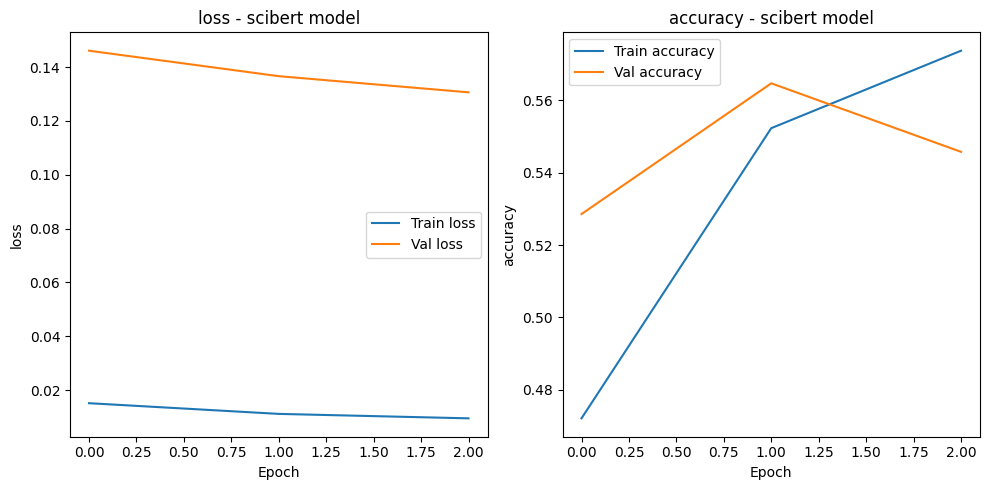

In [ ]:
def plot_model_performance(model_history, model_name='Model'):
    metrics = ['loss', 'accuracy']
    plt.figure(figsize=(10, 5))

    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.plot(model_history.history[metric], label='Train ' + metric)
        plt.plot(model_history.history['val_' + metric], label='Val ' + metric)
        plt.title('%s - %s' % (metric, model_name))
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_model_performance(model_history, model_name='scibert model')

In [ ]:
val_score = scibert_model.evaluate(
    valid_inputs,
    val_labels,
    batch_size=8
)
print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])


502/502 [==============================] - 109s 216ms/step - loss: 0.1306 - accuracy: 0.5458
Val loss: 0.13060331344604492
Val accuracy: 0.5457720160484314


In [ ]:
val_predictions = scibert_model.predict(
    valid_inputs,
    batch_size=8
)


502/502 [==============================] - 117s 214ms/step


              precision    recall  f1-score   support

        AGRI       0.82      0.65      0.72       420
        BIOC       0.72      0.66      0.69       691
        CENG       0.68      0.51      0.58       170
        CHEM       0.69      0.52      0.59       242
        COMP       0.51      0.54      0.52       175
        EART       0.77      0.81      0.79       225
        ENER       0.70      0.80      0.75       253
        ENGI       0.58      0.71      0.64       428
        ENVI       0.67      0.69      0.68       499
        IMMU       0.69      0.62      0.65       265
        MATE       0.78      0.77      0.77       349
        MEDI       0.85      0.68      0.76       819
        MULT       0.89      0.62      0.73       454
        NEUR       0.82      0.87      0.85       331
        PHAR       0.66      0.67      0.67       219
        PHYS       0.49      0.73      0.59       237
        PSYC       0.44      0.86      0.58       118
        SOCI       0.83    

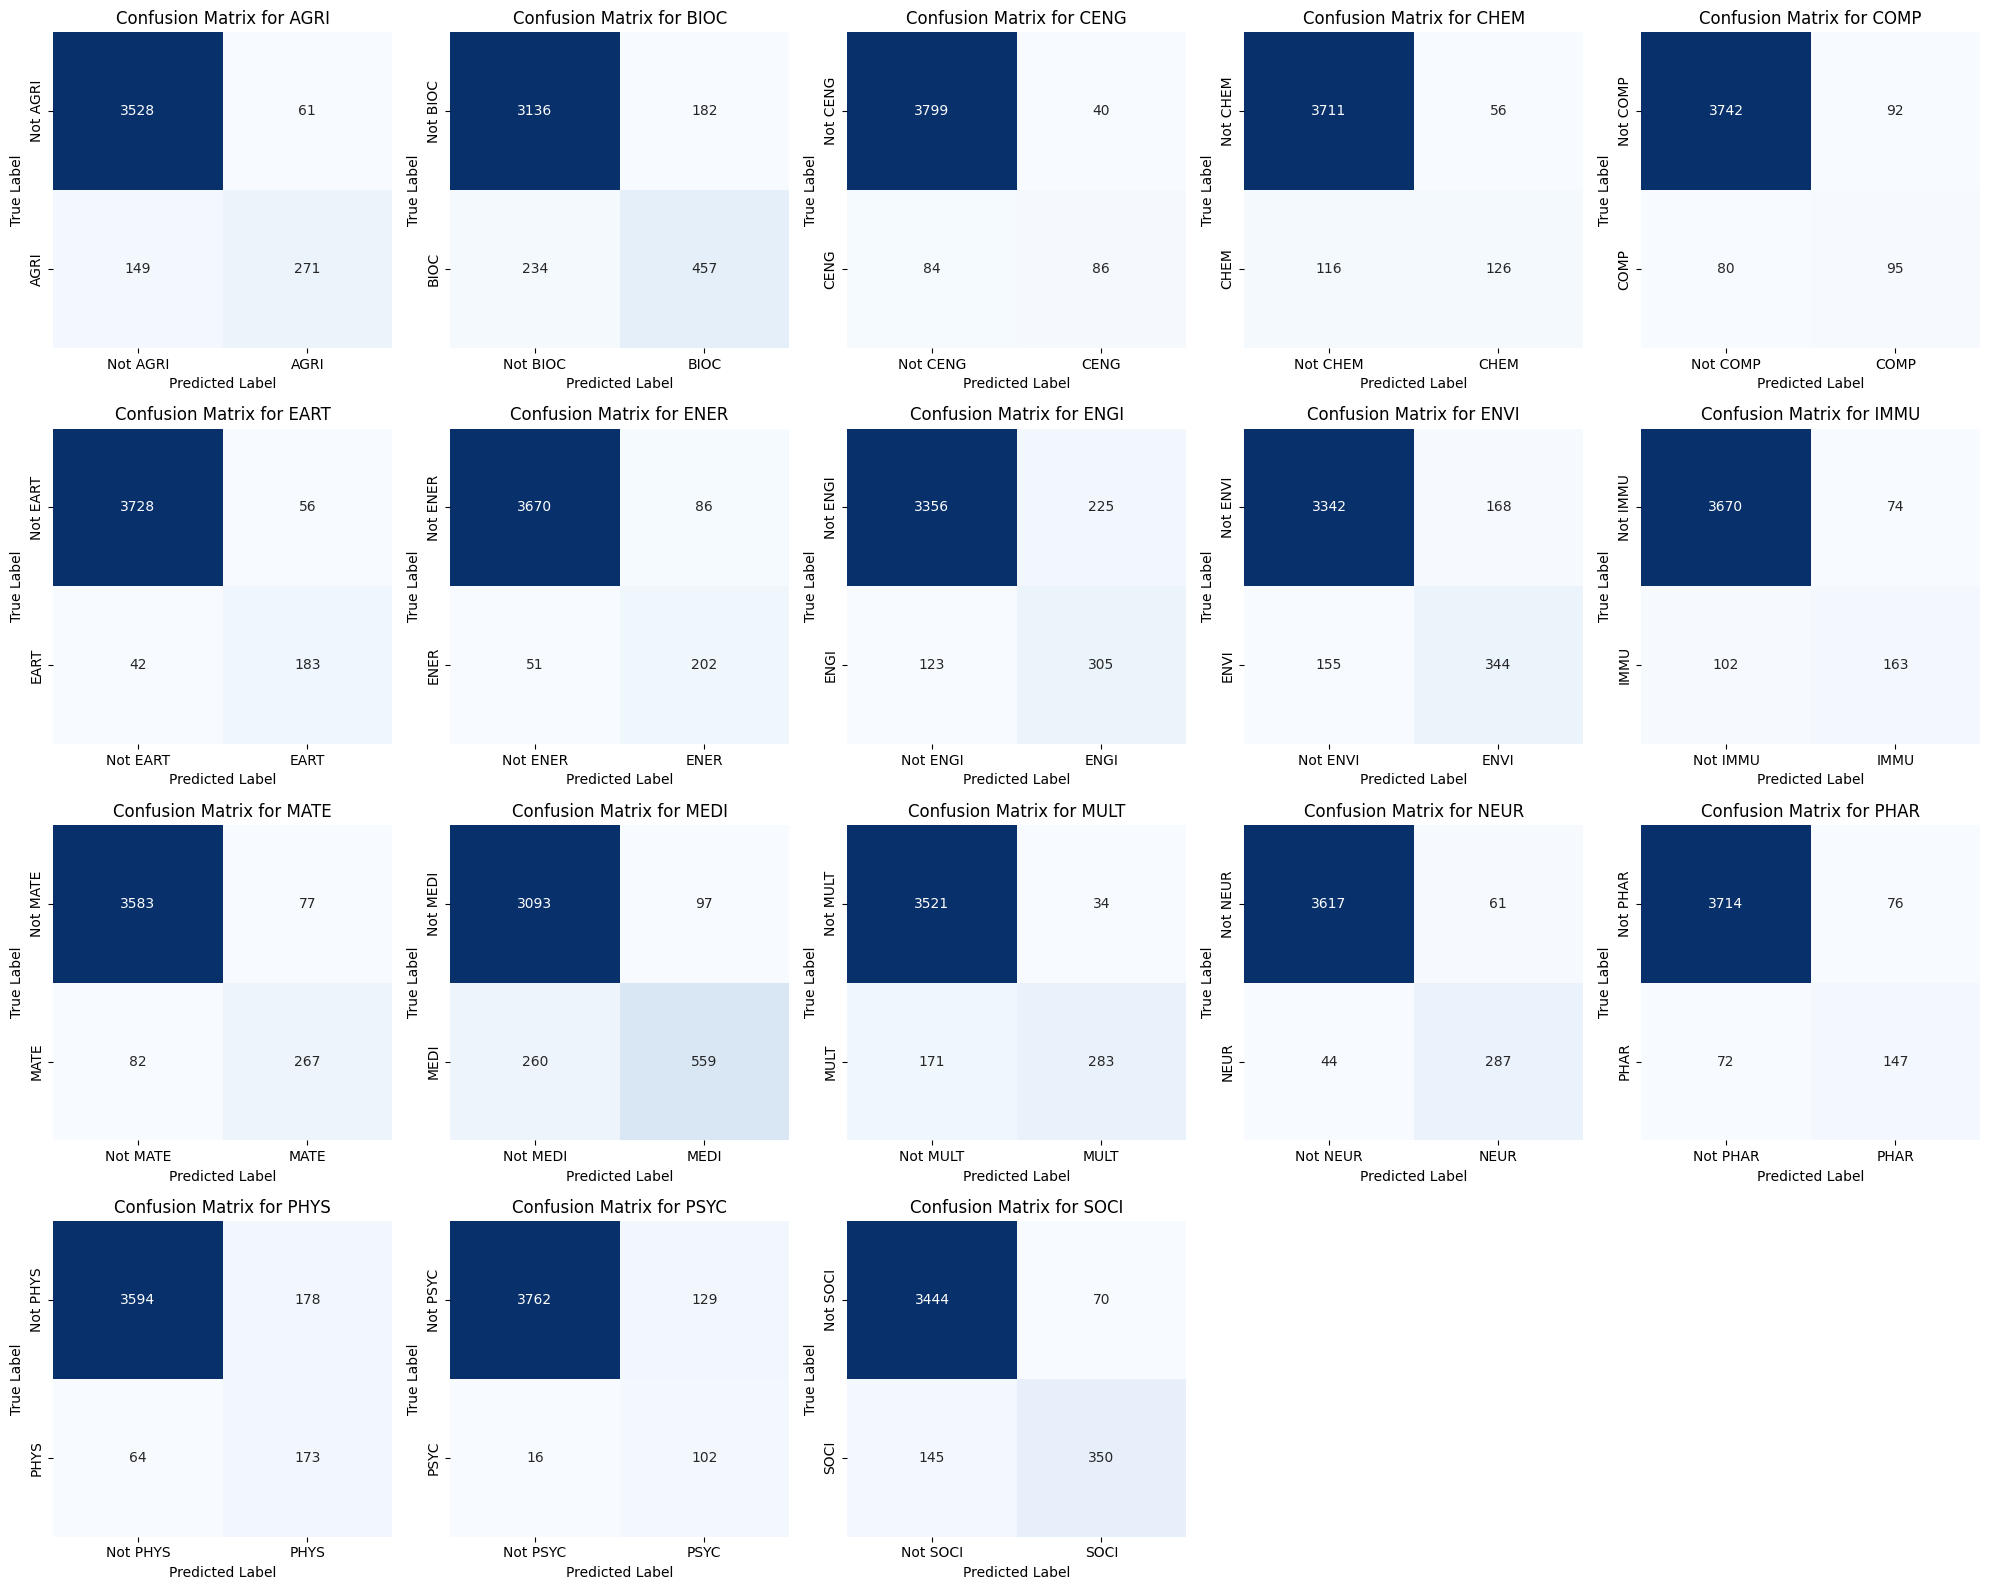

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    yhat_val = (val_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_results(scibert_model,
             valid_inputs,
             val_labels,
             target_names)


In [ ]:
test_score = scibert_model.evaluate(
    test_inputs,
    test_labels,
    batch_size=8
)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])


501/501 [==============================] - 109s 217ms/step - loss: 0.1310 - accuracy: 0.5549
Test loss: 0.13102521002292633
Test accuracy: 0.5548902153968811


In [ ]:
test_predictions = scibert_model.predict(
    test_inputs,
    batch_size=8
)


501/501 [==============================] - 107s 215ms/step


              precision    recall  f1-score   support

        AGRI       0.82      0.69      0.75       421
        BIOC       0.73      0.64      0.68       688
        CENG       0.62      0.51      0.56       200
        CHEM       0.61      0.50      0.55       252
        COMP       0.55      0.49      0.51       148
        EART       0.78      0.76      0.77       221
        ENER       0.69      0.71      0.70       256
        ENGI       0.58      0.70      0.63       424
        ENVI       0.71      0.67      0.69       534
        IMMU       0.65      0.66      0.65       218
        MATE       0.72      0.74      0.73       308
        MEDI       0.82      0.67      0.74       768
        MULT       0.91      0.67      0.77       474
        NEUR       0.83      0.86      0.85       349
        PHAR       0.72      0.63      0.67       273
        PHYS       0.51      0.76      0.61       225
        PSYC       0.46      0.80      0.58       139
        SOCI       0.82    

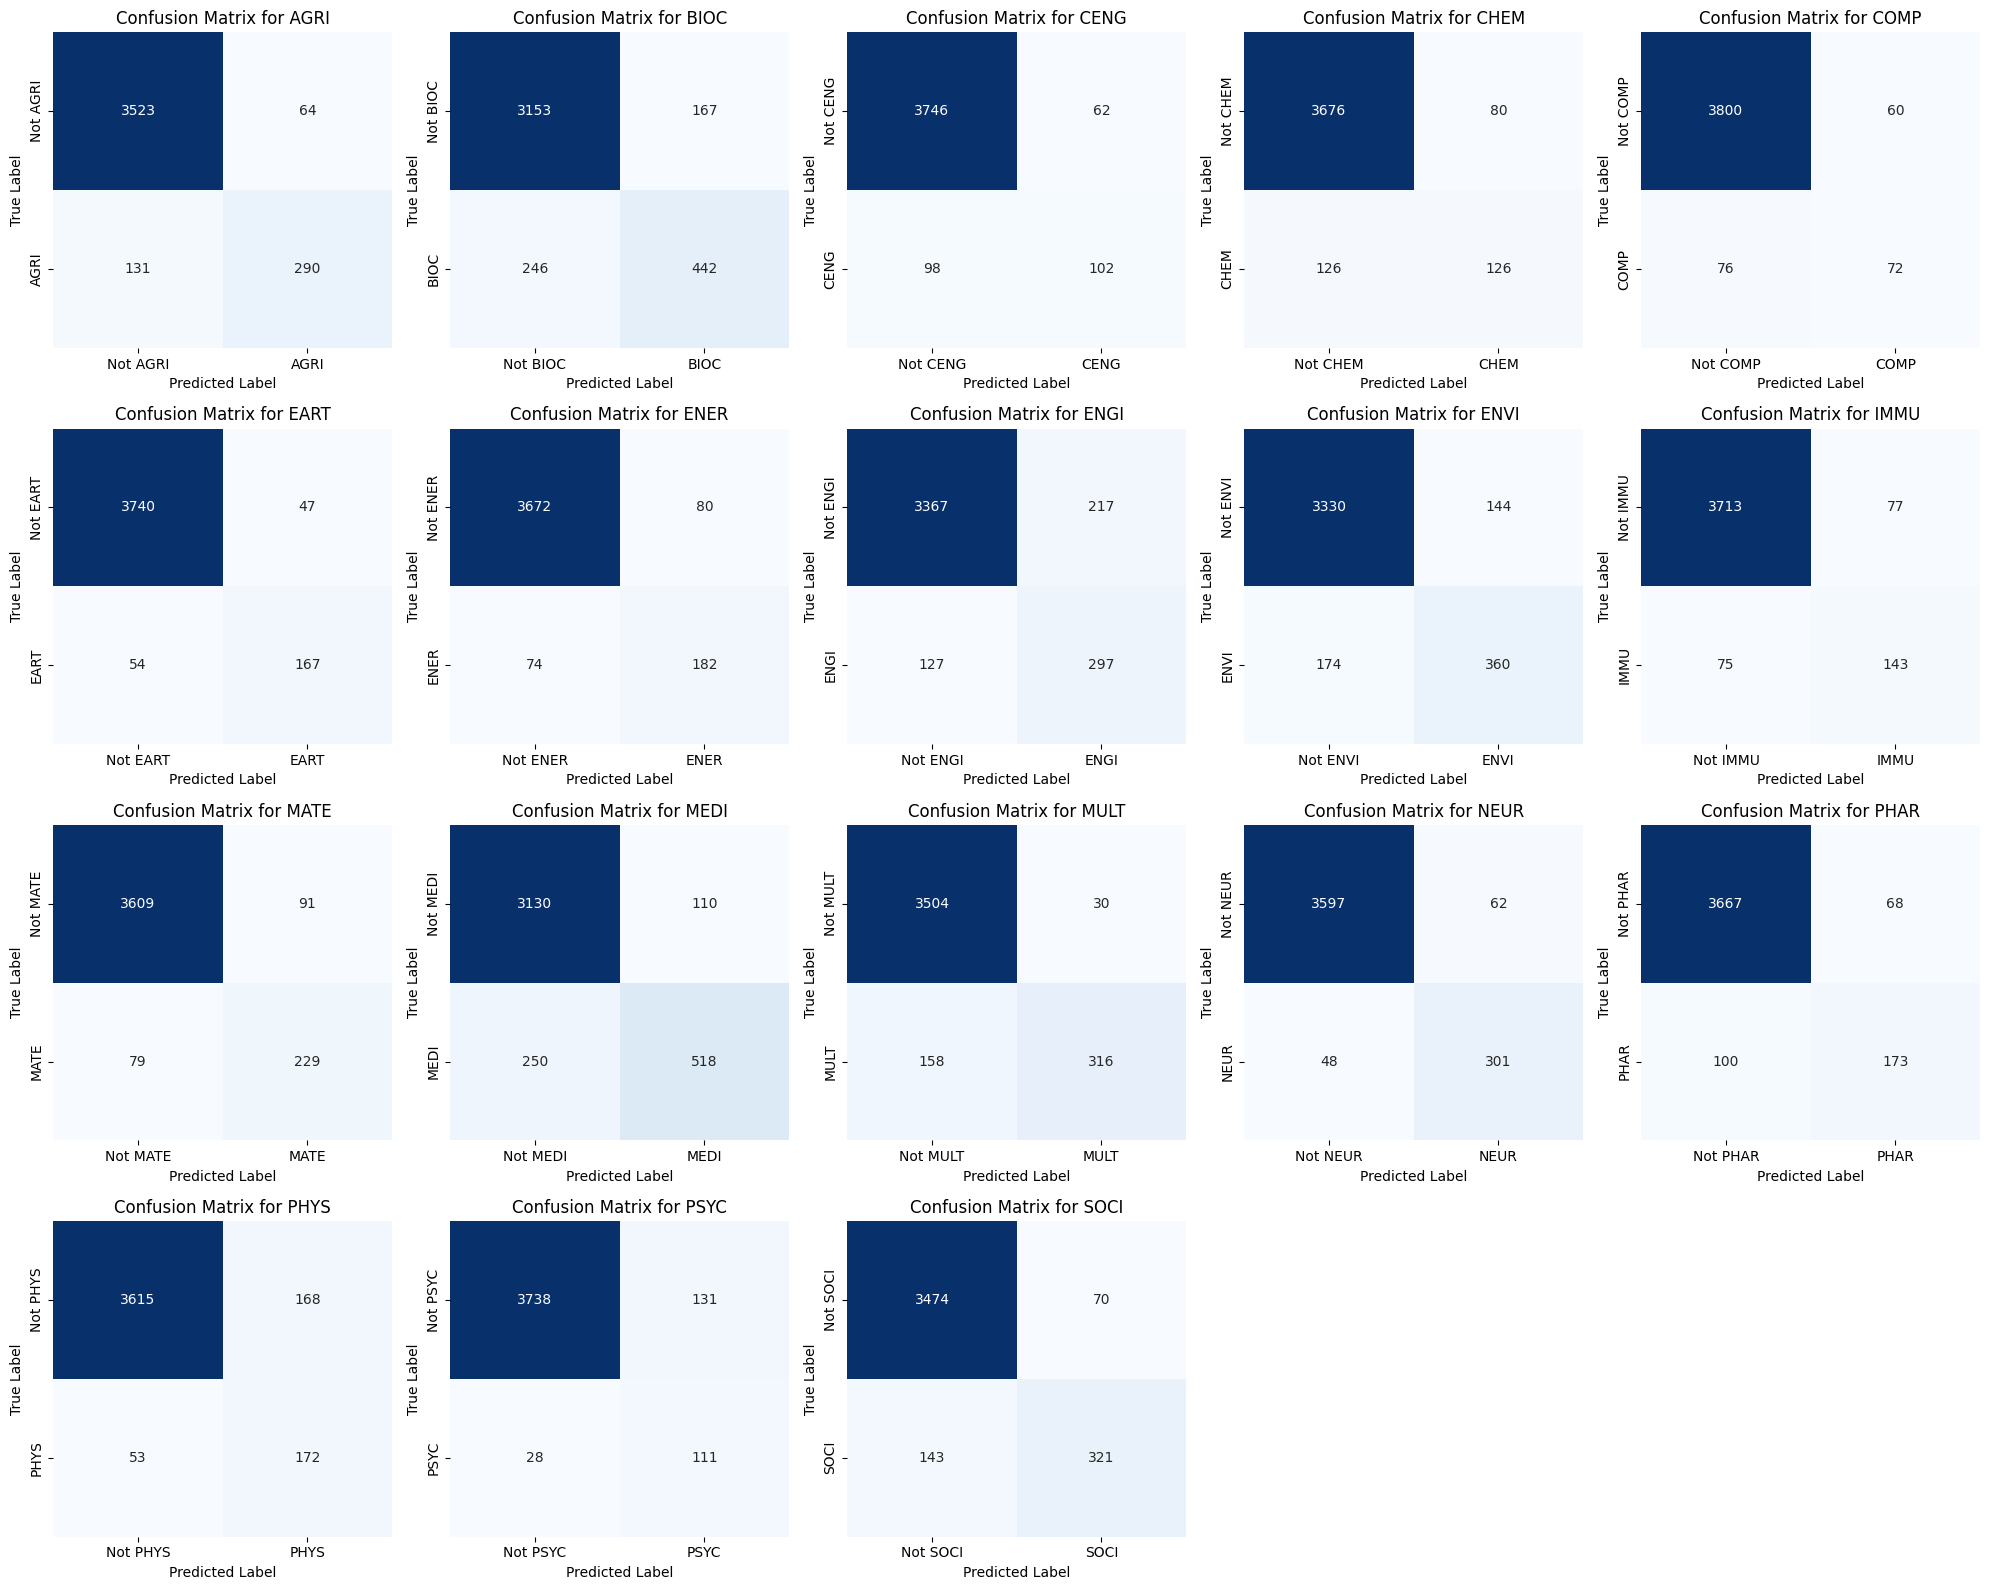

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    yhat_test = (test_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_test, target_names=classes, zero_division=1))

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_test)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_results(scibert_model,
             test_inputs,
             test_labels,
             target_names)


Validation and Test ROC Curve

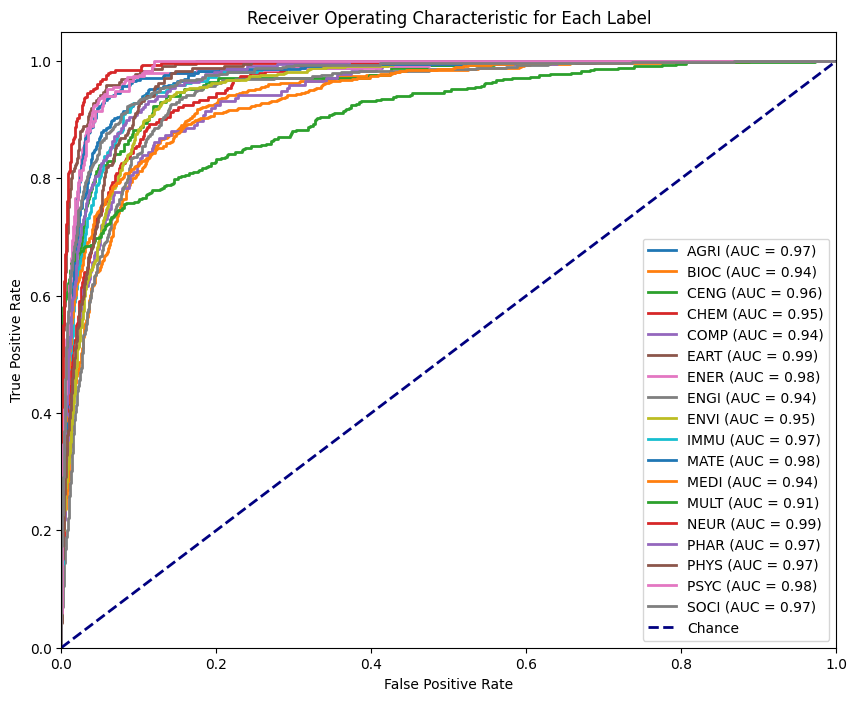

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


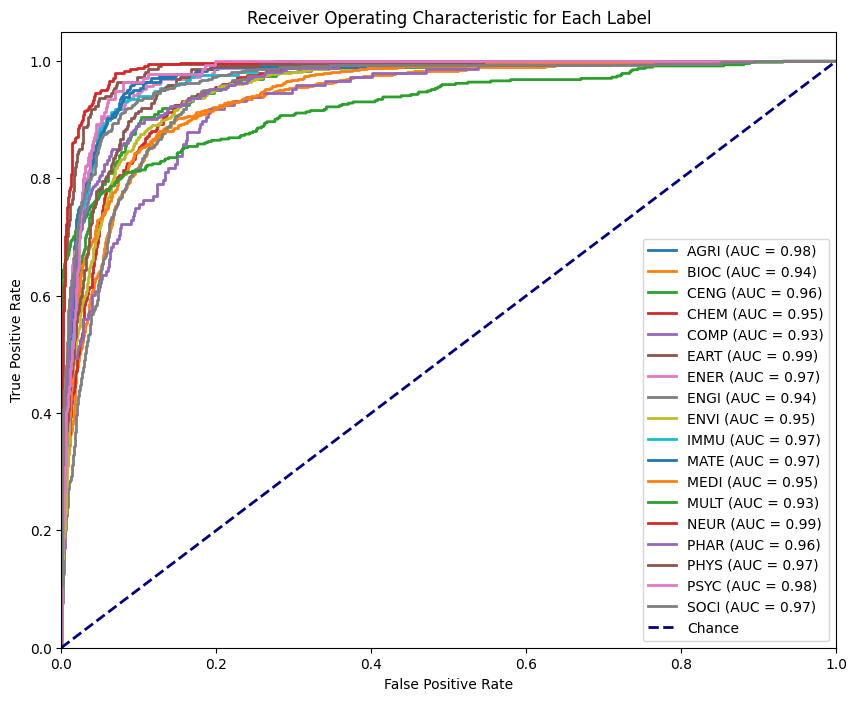

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(test_labels, test_predictions, target_names)


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        # Identify the max probability and corresponding label
        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0  # Reset max_prob if no labels meet the threshold
            max_labels.append("No Label")

    # Preparing the DataFrame
    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    # Saving the results
    result_df.to_csv(result_path + 'scibert_cnn_part4.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, concatenated_test_texts, test_df, target_names, result_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
0,[Here we investigate the increasingly complex ...,"[ENVI, SOCI]","ENER, ENVI",ENVI,0.803758
1,"[During the last decades, high-throughput tech...","[BIOC, COMP]","BIOC, COMP",COMP,0.822670
2,[Translucence is an important property of natu...,"[NEUR, PSYC]","NEUR, PSYC",NEUR,0.962604
3,[Background and objectives Inadequate minority...,[PHAR],MEDI,MEDI,0.645430
4,[The molecular structure modeling of the β1 su...,"[BIOC, COMP]",BIOC,BIOC,0.754698
...,...,...,...,...,...
4003,[Expansion of a polyglutamine-encoding trinucl...,[BIOC],BIOC,BIOC,0.925567
4004,[Trypanosoma copemani has been found infecting...,[IMMU],"AGRI, IMMU, MEDI",MEDI,0.914831
4005,[The design of an effective HIV-1 vaccine rema...,"[BIOC, PHAR]","BIOC, MEDI, PHAR",BIOC,0.549026
4006,[The present study aimed to develop monitoring...,"[AGRI, EART, ENVI]","AGRI, EART",AGRI,0.910053
